# US15

### Introdução:
...
___

### Código e Resultados:

In [1]:
# CÓDIGO

### Análise e interpretação dos resultados:
...

### Fórmulas Usadas:

...


---

# US16

### Introdução:
...
___

### Código e Resultados:

O melhor ajuste é um polinômio de grau 5


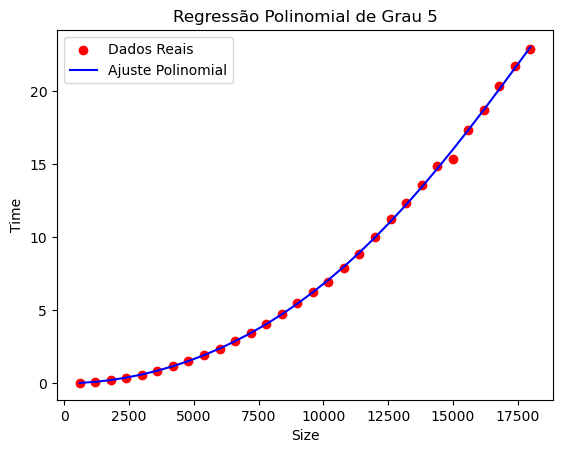

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Carregar os dados do arquivo CSV
data = pd.read_csv('../datasetsMATCP/solution_us14.csv', delimiter=';')
data['time'] = data['time'].str.replace(',', '.').astype(float)

sizes = data['size'].values
times = data['time'].values

# Transformar os dados para uma forma adequada à regressão polinomial
sizes = sizes.reshape(-1, 1)

# Listas para armazenar erros e modelos
errors = []
models = []

# Testar polinômios de grau 1 a 5
for degree in range(1, 6):
    poly = PolynomialFeatures(degree)
    sizes_poly = poly.fit_transform(sizes)

    model = LinearRegression()
    model.fit(sizes_poly, times)

    times_pred = model.predict(sizes_poly)
    error = mean_squared_error(times, times_pred)

    errors.append(error)
    models.append((degree, model, poly))

# Encontrar o modelo com menor erro
best_degree, best_model, best_poly = sorted(zip(errors, models))[0][1]

print(f"O melhor ajuste é um polinômio de grau {best_degree}")

# Prever os tempos usando o melhor modelo
sizes_poly_best = best_poly.fit_transform(sizes)
times_pred_best = best_model.predict(sizes_poly_best)

# Plotar os resultados
plt.scatter(sizes, times, color='red', label='Dados Reais')
plt.plot(sizes, times_pred_best, color='blue', label='Ajuste Polinomial')
plt.xlabel('Size')
plt.ylabel('Time')
plt.title(f'Regressão Polinomial de Grau {best_degree}')
plt.legend()
plt.show() 


### Análise e interpretação dos resultados:
...

### Fórmulas Usadas:

...


---